# Descriptive Statistics

Descriptive statistics or summative statistics describes and summarize the features of the data

#### PDF (probability density function)
$$ Pr[a \leq X \leq b] = \int_a^b f(x)dx $$ 
$$ - \infty \leq x \leq \infty, 0 \leq Pr \leq 1$$


#### CDF (cumulative distribution function)
$$ F(x) = \int^x_{-\infty} f(u) du $$
$$ - \infty \leq x \leq \infty, 0 \leq F(x) \leq 1$$


#### Quantile (percentile)
$$ Q(x) = F^{-1}(x) $$
$$ 0 \leq x \leq 1, - \infty \leq Q(x) \leq \infty$$

###### import the modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'PPF')

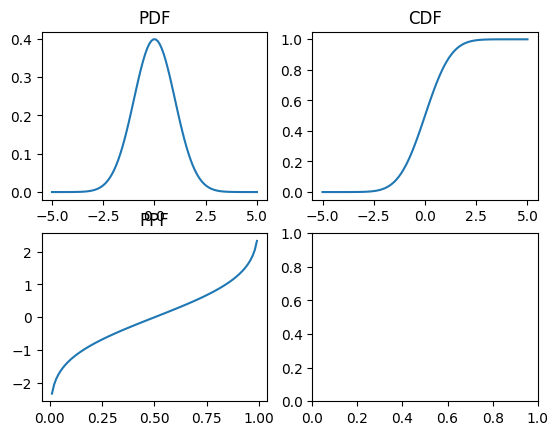

In [2]:
# gaussian
from scipy.stats import norm
rv = norm()
fig, ax =  plt.subplots(2,2)


# PDF
x = np.linspace(-5, 5, 100)
ax[0][0].plot(x, rv.pdf(x))
ax[0][0].set_title('PDF')


# CDF
ax[0][1].plot(x, rv.cdf(x))
ax[0][1].set_title('CDF')


# PPF
x = np.linspace(0, 1, 100)

ax[1][0].plot(x, rv.ppf(x))
ax[1][0].set_title('PPF')

# ignore the bottom right plot, it's empty as normal

## Common distributions

#### Gaussian (normal)
$$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} exp\left(-\frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^2 \right) $$


#### Poisson
$$ f(k) = e^{-\mu} \frac{\mu^k}{k!} $$


#### Chi squared
$$ f(x, k) = \frac{1}{2^{k/2}\Gamma(k/2)} x^{k/2-1} exp(-x/2) $$


#### Cauchy
$$ f(x) = \frac{1}{\pi(1+x^2)} $$

Text(0.5, 1.0, 'Cauchy')

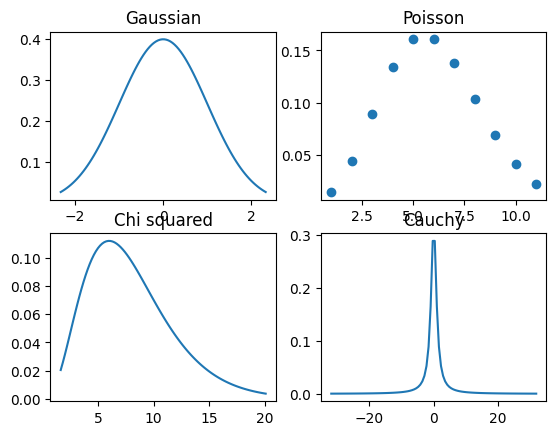

In [3]:
from scipy.stats import norm, poisson, chi2, cauchy
fig, ax =  plt.subplots(2,2)

# gaussian
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
rv = norm()
ax[0][0].plot(x, rv.pdf(x))
ax[0][0].set_title('Gaussian')


# possian
mu = 6
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
rv = poisson(mu)
ax[0][1].plot(x, rv.pmf(x), 'o')
ax[0][1].set_title('Poisson')


# chi2
df = 8
x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 100)
rv = chi2(df)
ax[1][0].plot(x, rv.pdf(x))
ax[1][0].set_title('Chi squared')


# cauchy
x = np.linspace(cauchy.ppf(0.01), cauchy.ppf(0.99), 100)
rv = cauchy()
ax[1][1].plot(x, rv.pdf(x))
ax[1][1].set_title('Cauchy')


$$\text{Mean} : \mu= \bar{x} = \int x P(x) dx = \frac{\displaystyle\sum_{i=1}^{n}x_{i}}{n}$$
$$\text{Variance} (\text{standard deviation}^2): \sigma^2 = \int (x-\mu)^2 P(x) dx = \frac{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})^{2}}{n}$$


$$\text{Covariance} : cov_{x,y} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{N-1}$$
$$\text{Correlation} : r_{x,y} =  \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2} \sqrt{\sum(y_i - \bar{y})^2}} = \frac{cov_{x,y}}{\sigma_x \sigma_y}$$

###### mean and std

In [4]:
a = [11, 21, 34, 22, 27, 11, 23, 21]
print(np.mean(a))
print(np.std(a))

21.25
7.1545440106270926


###### percentile

In [5]:
from scipy.stats import percentileofscore
grades = [50,50,46,95,50,5,57]
print(percentileofscore(grades, 57))

85.71428571428572


###### covariance matrix

In [6]:
x = [1.23, 2.12, 3.34, 4.5]
y = [2.56, 2.89, 3.76, 3.95]
 
# find out covariance with respect  columns
cov_mat = np.stack((x, y), axis = 0)
 
print(np.cov(cov_mat))

[[2.03629167 0.9313    ]
 [0.9313     0.4498    ]]


###### correlation

In [7]:
from scipy.stats import pearsonr
res = pearsonr([1, 2, 3, 4, 5], [10, 9, 2.5, 6, 4])
print(res) # look at the "statistic=XXXXX"

PearsonRResult(statistic=-0.7426106572325059, pvalue=0.15055580885344538)


# Sampling

first 20 elements in norm.rvs
[ 0.2836211  -0.82529657 -0.00350588 -0.59560542 -2.28045571 -0.3693547
 -0.82228231  0.13801312  1.46375277  1.78098278 -1.88893014 -0.57386265
  0.31588964  0.13752525  0.86059772  0.36026113 -0.17436962 -0.16038928
 -1.06723062 -0.36363062]


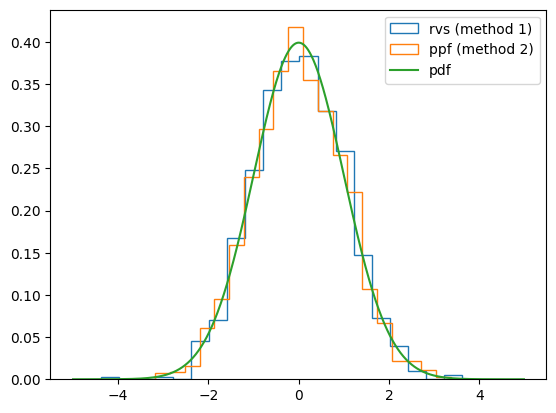

In [9]:
from random import random
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np


# Model parameters
mean = 0
std = 1
n_bins = 20


# Method 1: use rvs
r = norm.rvs(size=1000)

print('first 20 elements in norm.rvs')
print(r[:20])

# Method 2: use ppf
xx = []
yy = []
for _ in range(2000):
    x = random()  # between 0,1
    y = norm.ppf(x, loc=mean, scale=std)
    xx.append(x)
    yy.append(y)


# Draw gaussian distribution for confirmation
norm_xx = np.arange(-5, 5, 0.01)
norm_yy = norm.pdf(norm_xx, loc=mean, scale=std)


# Set density=True to normalize the histogram
plt.hist(r, bins=n_bins, density=True, label="rvs (method 1)", histtype="step")
plt.hist(yy, bins=n_bins, density=True, label="ppf (method 2)", histtype="step")
plt.plot(norm_xx, norm_yy, '-', label="pdf")
plt.legend()
plt.show()